## 워드 클라우드
- WordCloud 설치 : **pip install wordcloud**

In [2]:
from wordcloud import WordCloud, STOPWORDS

import numpy as np
from PIL import Image

### Alice in Wonderland

In [3]:
text = open('data/21_alice.txt').read()
alice_mask = np.array(Image.open('data/21_alice_mask.png'))

stopwords = set(STOPWORDS)
stopwords.add("said")

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['axes.unicode_minus'] = False   # minus 표시
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 10
%matplotlib inline

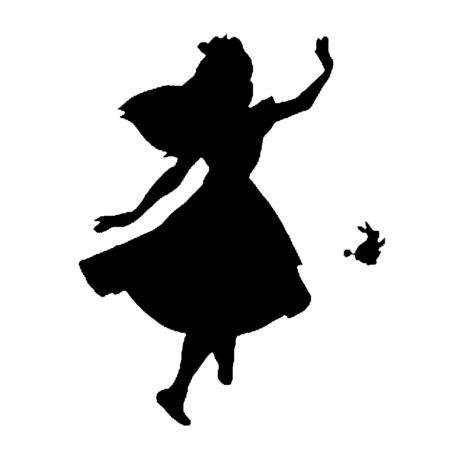

In [5]:
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

In [6]:
wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask,
              stopwords = stopwords)
wc = wc.generate(text)
wc.words_

{'Alice': 1.0,
 'little': 0.2958904109589041,
 'one': 0.2602739726027397,
 'know': 0.2465753424657534,
 'went': 0.2273972602739726,
 'thing': 0.2191780821917808,
 'time': 0.21095890410958903,
 'Queen': 0.20821917808219179,
 'see': 0.18356164383561643,
 'King': 0.17534246575342466,
 'now': 0.1643835616438356,
 'began': 0.1589041095890411,
 'way': 0.15616438356164383,
 'Hatter': 0.15616438356164383,
 'head': 0.15342465753424658,
 'Mock Turtle': 0.15342465753424658,
 'say': 0.1506849315068493,
 'Gryphon': 0.1506849315068493,
 'well': 0.14794520547945206,
 'think': 0.14520547945205478,
 'quite': 0.14246575342465753,
 'much': 0.13972602739726028,
 'first': 0.13972602739726028,
 'go': 0.136986301369863,
 'thought': 0.13424657534246576,
 'come': 0.13150684931506848,
 'never': 0.12876712328767123,
 'voice': 0.12602739726027398,
 'looked': 0.1232876712328767,
 'got': 0.1232876712328767,
 'must': 0.12054794520547946,
 'Cat': 0.12054794520547946,
 'Mouse': 0.12054794520547946,
 'Duchess': 0.11506

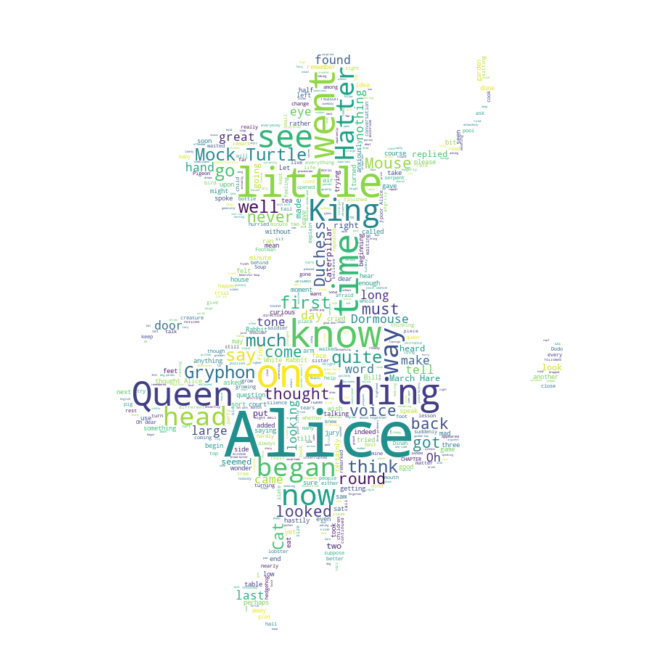

In [7]:
plt.figure(figsize=(12,12))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

### Star Wars - A new hope

In [9]:
text = open('data/21_a_new_hope.txt').read()

text = text.replace('HAN', 'Han')
text = text.replace("LUKE'S", 'Luke')

mask = np.array(Image.open('data/21_stormtrooper_mask.png'))

In [10]:
stopwords = set(STOPWORDS)
stopwords.add("int")
stopwords.add("ext")

In [11]:
wc = WordCloud(max_words=1000, mask=mask, stopwords=stopwords, 
               margin=10, random_state=1).generate(text)

default_colors = wc.to_array()

In [12]:
import random
def grey_color_func(word, font_size, position, orientation, 
                    random_state=None, **kwargs):
    return 'hsl(0, 0%%, %d%%)' % random.randint(60,100)

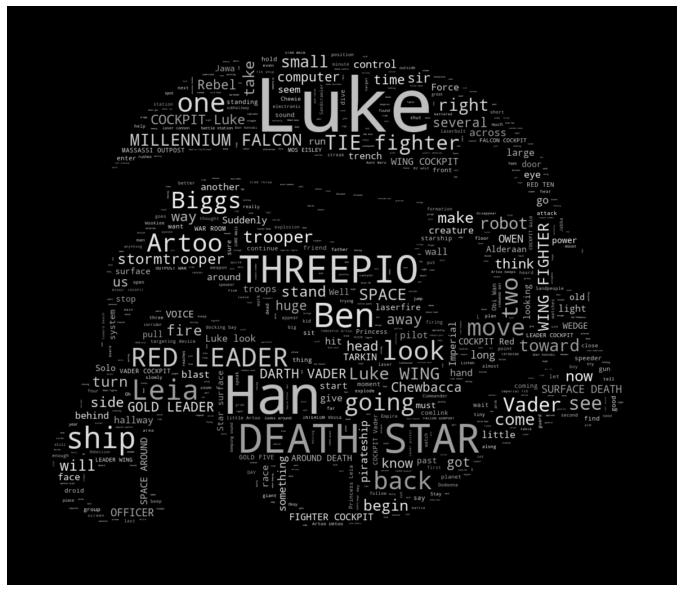

In [13]:
plt.figure(figsize=(12,12))
plt.imshow(wc.recolor(color_func=grey_color_func, random_state=3),
          interpolation='bilinear')
plt.axis('off')
plt.show()

### 여자 친구 선물 고르기

In [14]:
from bs4 import BeautifulSoup 
from urllib.request import urlopen
import urllib
import time

In [15]:
tmp1 = 'https://search.naver.com/search.naver?where=kin'
html = tmp1 + '&sm=tab_jum&ie=utf8&query={key_word}&start={num}'

response = urlopen(html.format(num=1, key_word=urllib.parse.quote('여친 선물')))

soup = BeautifulSoup(response, "html.parser")

tmp = soup.find_all('dl')

In [16]:
tmp_list = []
for line in tmp:
    tmp_list.append(line.text)
    
tmp_list

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    웨스트아일랜드   반지갑   여친 생일선물   주얼리 브랜드   유인나 시계   질스튜어트   까르벵 시계   파니니백     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  여친선물로 생로랑 틴트 평이 좋아보이   2019.08.30.   여친선물로 생로랑 틴트 평이 좋아보이길래 틴트랑 이것저것 필요한걸로 좀 사줄려구 하는데요. 사는지역이 구미인데 구미에 구매 할수있는곳이 있나요? 아니면 대구 신세계...   답변 백화점에서 구매하는게 좋습니다 일단 다른 오프매장은 마땅히 구매할 만한 곳이 없구요! 또 유통채널들 중에서 가장 다양하게 틴트 라인업 보유하고 있고 재고가 충분히...      ',
 '  질문  생리기간 여친선물 줄만한거   2018.12.18.   여친이 생리기간만 되면 너무 힘들어하는데 그럴때 줄만한 여친선물 있을까요ㅠㅠ? 간단한거라도 좋아용..생리기간에 힘내라고 여친선물 주고싶어서요   답변 생리기간에는 예민해서 여친선물로 여자친구가 조아하는걸로 주는게 좋을거 같아요 생리기간 잘 이겨내도록 좋은 여친선물 고르세요!      ',
 '  질문  여친 선물   5일 전   여자들이 좋아할만한 선물이 무엇이 있나요?? 곧 200일이라...   답변 안녕하세요 수제가죽 브랜드 톰크롬입니다. 여자친구분에게 선물로 수제가죽으로 만든 카드지갑은 어떨까요? 수제가죽으로 만든 지갑에 관심이 있으시면 저희 브랜드 한번...      ',
 '  질문  여친 선물로   2019.06.07.   좋은건??   답변 토닥토닥워터 너의이름은장미를 추천해요 장미와 건조레몬,딸기, 히비스커스가 블랜딩 되어 있어 상큼하고 

In [17]:
from tqdm import tqdm_notebook

present_candi_text = []
for n in tqdm_notebook(range(1, 1000, 10)):
    response = urlopen(html.format(num=n, key_word=urllib.parse.quote('여자 친구 선물')))
    soup = BeautifulSoup(response, "html.parser")
    tmp = soup.find_all('dl')
    for line in tmp:
        present_candi_text.append(line.text)
        
    time.sleep(0.5)

In [18]:
present_candi_text

[' 기본검색   입력한 단어가 하나이상 포함된 문서 검색  ',
 ' 상세검색  정확히 일치하는 단어/문장(" ") 반드시 포함하는 단어(+) 제외하는 단어(-)  기본검색의 결과 범위를 줄이고자 할 때 사용합니다.여러개의 단어를 입력하실 때는쉼표(,)로 구분해서 입력하세요.   ',
 ' 연관검색어도움말    여자친구목걸이   스킨케어   여자스킨로션추천   여자30대선물   에센스추천   20대여자친구선물   여자친구선물뷰티디바이스   선물   여자친구생일선물   여자근력운동     닫기 후 1주일간 유지됩니다. 연관검색어를 다시 보시겠습니까? 열기 ',
 '  질문  여자친구 선물(20-30)대 괜찮은거 뭐 있나요?   2019.08.26.   안녕하세요 여자친구 선물로 고민하고 있습니다 늘 기념일마다... 싶은 여자친구 선물이였음 좋겠는데 가격은 큰 상관없지만 특별하고 간직할 만한 그런 여자친구 선물이면...   답변 여자친구 선물 이건 누구나 한번쯤 고민해 봤을 것... 노미네이션을여자친구 선물로 추천하는 이유는 여친과의... 좀 캐쥬얼하고 부담없는 가격대 여자친구 선물 중에서는...      ',
 '  질문  20대 여자친구 선물로 어떤 걸 해줘야 할까요??   2019.06.10.   이번에는 좀 색다른 걸 해주고 싶은데요, 웬만한 20대 여자친구 선물로 해줄건 다... 이미 줄 건 다 줘봤습니다. 20대 여자친구 선물로 실용적인 거 있음 추천해주세요.   답변 20대 여자친구 선물에 대한 답변 드립니다. 20대 여자친구 선물로 보편적인 것은 반지, 팔찌, 목걸이 등등의... 이상으로 20대 여자친구 선물에 대한 답변이었습니다.      ',
 '  질문  30대여자친구선물 여러개 추천좀 해주세요   2019.08.22.   30대여자친구선물로 좋은 거 여러개 추천해주세요. 그 중에서 골라서 선물하던지... 그동안 30대여자친구선물이라고 함은 향수, 시계, 목걸이, 등등 딱히 엄청나게 좋아했던...   답변 30대여자친구선물 같은 경우는 실용적

In [19]:
len(present_candi_text)

1300

In [20]:
present_text = ''

for each_line in present_candi_text[:10000]:
    present_text = present_text + each_line + '\n'

In [22]:
from konlpy.tag import Okt
t = Okt()

C:\ProgramData\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [23]:
tokens_ko = t.morphs(present_text)
tokens_ko

['기본',
 '검색',
 '입력',
 '한',
 '단어',
 '가',
 '하나',
 '이상',
 '포함',
 '된',
 '문서',
 '검색',
 '상세',
 '검색',
 '정확히',
 '일치',
 '하는',
 '단어',
 '/',
 '문장',
 '("',
 '")',
 '반드시',
 '포함',
 '하는',
 '단어',
 '(+)',
 '제외',
 '하는',
 '단어',
 '(-)',
 '기',
 '본',
 '검색',
 '의',
 '결과',
 '범위',
 '를',
 '줄이고자',
 '할',
 '때',
 '사용',
 '합니다',
 '.',
 '여러',
 '개',
 '의',
 '단어',
 '를',
 '입력',
 '하실',
 '때',
 '는',
 '쉼표',
 '(,)',
 '로',
 '구분',
 '해서',
 '입력',
 '하세요',
 '.',
 '연관검색어',
 '도움말',
 '여자친구',
 '목걸이',
 '스킨',
 '케어',
 '여자',
 '스킨로션',
 '추천',
 '여자',
 '30',
 '대',
 '선물',
 '에센스',
 '추천',
 '20',
 '대',
 '여자친구',
 '선물',
 '여자친구',
 '선물',
 '뷰티',
 '디바이스',
 '선물',
 '여자친구',
 '생일',
 '선물',
 '여자',
 '근력',
 '운동',
 '닫기',
 '후',
 '1',
 '주',
 '일간',
 '유지',
 '됩니다',
 '.',
 '연관검색어',
 '를',
 '다시',
 '보시겠습니까',
 '?',
 '열기',
 '질문',
 '여자친구',
 '선물',
 '(',
 '20-30',
 ')',
 '대',
 '괜찮은',
 '거',
 '뭐',
 '있나요',
 '?',
 '2019.08',
 '.',
 '26',
 '.',
 '안녕하세요',
 '여자친구',
 '선물',
 '로',
 '고민',
 '하고',
 '있습니다',
 '늘',
 '기념일',
 '마다',
 '...',
 '싶은',
 '여자친구',
 '선물',
 '이',
 '였음',
 '좋겠는데',
 '가격',
 '은'

In [24]:
# Natural Language Toolkit
import nltk

In [25]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
print(len(ko.tokens))
print(len(set(ko.tokens)))

95000
378


In [26]:
ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(100)

[('선물', 6600),
 ('여자친구', 6200),
 ('대', 3800),
 ('.', 3500),
 ('로', 3300),
 ('...', 2700),
 ('20', 2400),
 (',', 1500),
 ('거', 1400),
 ('답변', 1400),
 ('질문', 1100),
 ('?', 900),
 ('추천', 800),
 ('이', 800),
 ('좋은', 800),
 ('가', 700),
 ('30', 700),
 ('10', 700),
 ('것', 600),
 ('좀', 600),
 ('화장품', 600),
 ('검색', 500),
 ('단어', 500),
 ('하는', 500),
 ('를', 500),
 ('는', 500),
 ('뭐', 500),
 ('고민', 500),
 ('걸', 500),
 ('다', 500),
 ('에', 500),
 ('너무', 500),
 ('!', 500),
 ('한', 400),
 ('여러', 400),
 ('여자', 400),
 ('괜찮은', 400),
 ('을', 400),
 ('어떤', 400),
 ('요', 400),
 ('줄', 400),
 ('적', 400),
 ('인', 400),
 ('해주세요', 400),
 ('좋을까요', 400),
 ('알려', 400),
 ('지갑', 400),
 ('라', 400),
 ('입력', 300),
 ('하나', 300),
 ('의', 300),
 ('개', 300),
 ('목걸이', 300),
 ('스킨', 300),
 ('생일', 300),
 ('2019.08', 300),
 ('은', 300),
 ('만', 300),
 ('중', 300),
 ('2019.06', 300),
 ('해주고', 300),
 ('제', 300),
 ('30만원', 300),
 ('정도', 300),
 ('친환경', 300),
 ('게', 300),
 ('이상', 200),
 ('포함', 200),
 ('된', 200),
 ('때', 200),
 ('하실', 200),
 ('연

In [27]:
ko.similar('여자친구')

In [28]:
stop_words = ['.','가','요','답변','...','을','수','에','질문','제','를','이','도','인',
              '좋','1','는','로','으로','2','것','은','다',',','니다','대','들','걸','해서',
              '2019','들','데','..','의','때','겠','고','게','네요','한','일','할','많이',
              '10','?','하는','06','주','려고','인데','거','좀','는데','~','ㅎㅎ','알려',
              '하나','이상','20','뭐','까','있는','잘','습니다','다면','했','주려','좋은',
              '지','있','못','후','중','줄','6','과','어떤','기본','!!','!','??','입니다',
              '단어','선물해','라고','중요한','합','가요','....','보이','네','무지','안',
              '2019.05','2019.06','100일','27','됩니다','너무','이런','괜찮은','저','검색',
              '해주고','적','안녕하세요','하기','연관검색어','싶은데','보','니까','거기','서',
              '합니다','좋을까요','기억','준비','하고','이번','아닐까','있는데요','2019.07',
              '건','주는','있으면','면','이나','해주세요','대한','해주면','살','된','때문',
              '남을만한','상세','정확히','일치','/','("','")','반드시','(+)','(-)','(,)',
              '반드시','기','기','결과','줄이고자','하실','여러','개','쉼표','하세요','고민']

In [29]:
tokens_ko = [each_word for each_word in tokens_ko 
                            if each_word not in stop_words]

ko = nltk.Text(tokens_ko, name='여자 친구 선물')
ko.vocab().most_common(50)

[('선물', 6600),
 ('여자친구', 6200),
 ('추천', 800),
 ('30', 700),
 ('화장품', 600),
 ('여자', 400),
 ('지갑', 400),
 ('라', 400),
 ('입력', 300),
 ('목걸이', 300),
 ('스킨', 300),
 ('생일', 300),
 ('2019.08', 300),
 ('만', 300),
 ('30만원', 300),
 ('정도', 300),
 ('친환경', 300),
 ('포함', 200),
 ('기념일', 200),
 ('가격', 200),
 ('나', 200),
 ('여친', 200),
 ('부담', 200),
 ('없는', 200),
 ('할까', 200),
 ('실용', 200),
 ('등등', 200),
 ('그', 200),
 ('향수', 200),
 ('같은', 200),
 ('경우', 200),
 ('더', 200),
 ('뭘', 200),
 ('13', 200),
 ('후반쯤', 200),
 ('40초', 200),
 ('브랜드', 200),
 ('가방', 200),
 ('명품', 200),
 ('으로는', 200),
 ('구입', 200),
 ('로는', 200),
 ('노아', 200),
 ('퓨어', 200),
 ('플라워', 200),
 ('로션', 200),
 ('주기', 200),
 ('알려주세요', 200),
 ('처음', 200),
 ('문서', 100)]

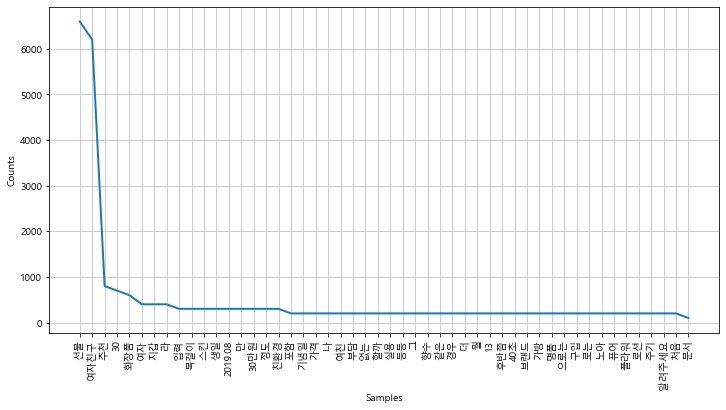

In [30]:
plt.figure(figsize=(12,6))
ko.plot(50) 
plt.show()

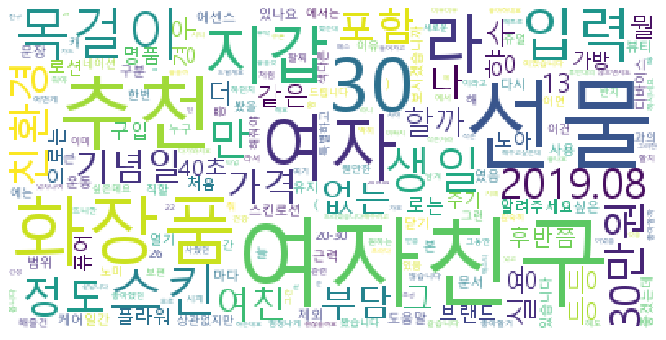

In [31]:
data = ko.vocab().most_common(300)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                      relative_scaling = 0.2,
                      #stopwords=STOPWORDS,
                      background_color='white',
                      ).generate_from_frequencies(dict(data))
plt.figure(figsize=(12,6))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [32]:
mask = np.array(Image.open('data/21_heart.jpg'))

from wordcloud import ImageColorGenerator
image_colors = ImageColorGenerator(mask)

In [33]:
data = ko.vocab().most_common(200)

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
               relative_scaling = 0.1, mask=mask,
               background_color = 'white',
               min_font_size=1,
               max_font_size=100).generate_from_frequencies(dict(data))

default_colors = wordcloud.to_array()

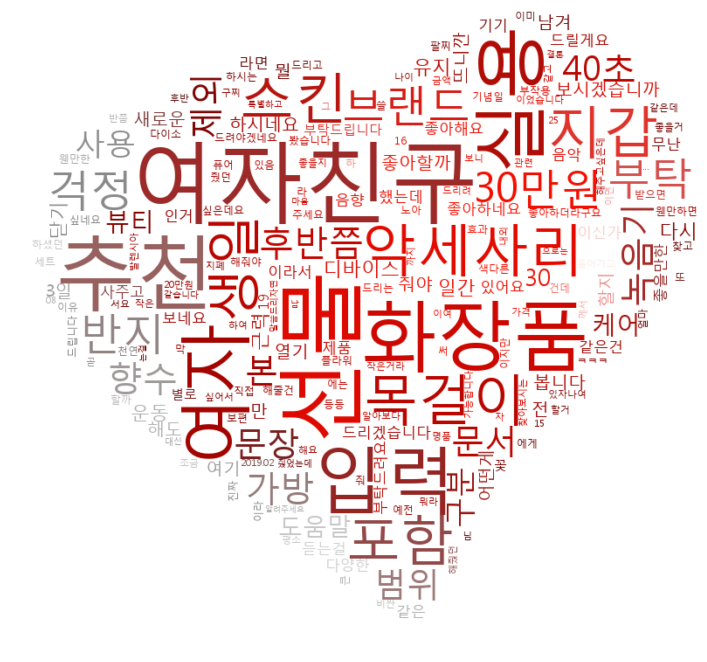

In [97]:
plt.figure(figsize=(12,12))
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis('off')
plt.show()